In [3]:
import numpy as np 
import scipy as sp
import matplotlib.pyplot as plt
import statistics as st
import cmath

#First, I import data from files in the same directory to get the reference and sample data#
data1 = np.loadtxt("AmpTimeRef.txt",dtype=float)
data2 = np.loadtxt("AmpTimeSample.txt",dtype=float)

#The x1,x2 parameter are here multiplied with 1e12 to get the right units (pico-seconds)
x1 = data1[:,0] * 1e12
y1 = data1[:,1]
x2 = data2[:,0] * 1e12
y2 = data2[:,1]

#Interpolate the data to get a common time base
startt = 0
endt = 3,96e-11 #3.96e-11 is the end time in seconds
dt = min(np.mean(np.diff(x1)), np.mean(np.diff(x2)))
t = np.arange(startt, endt + dt, dt)

sr = np.interp(t, tr, sr, left=0, right=0)
ss = np.interp(t, ts, ss, left=0, right=0)

plt.xscale("linear")
plt.yscale("linear")
plt.xlabel("Time (psec)")
plt.ylabel("Amplitude (a.u.)")
plt.title("Graph 0.1: Amplitude versus Time")
plt.plot(x1,y1)
plt.plot(x2,y2, color = "maroon")
plt.grid("--")
plt.legend([" Graph 0.1a:Amplitude versus Time", " Graph 0.1b:Amplitude versus Time, Sample"])
plt.show()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

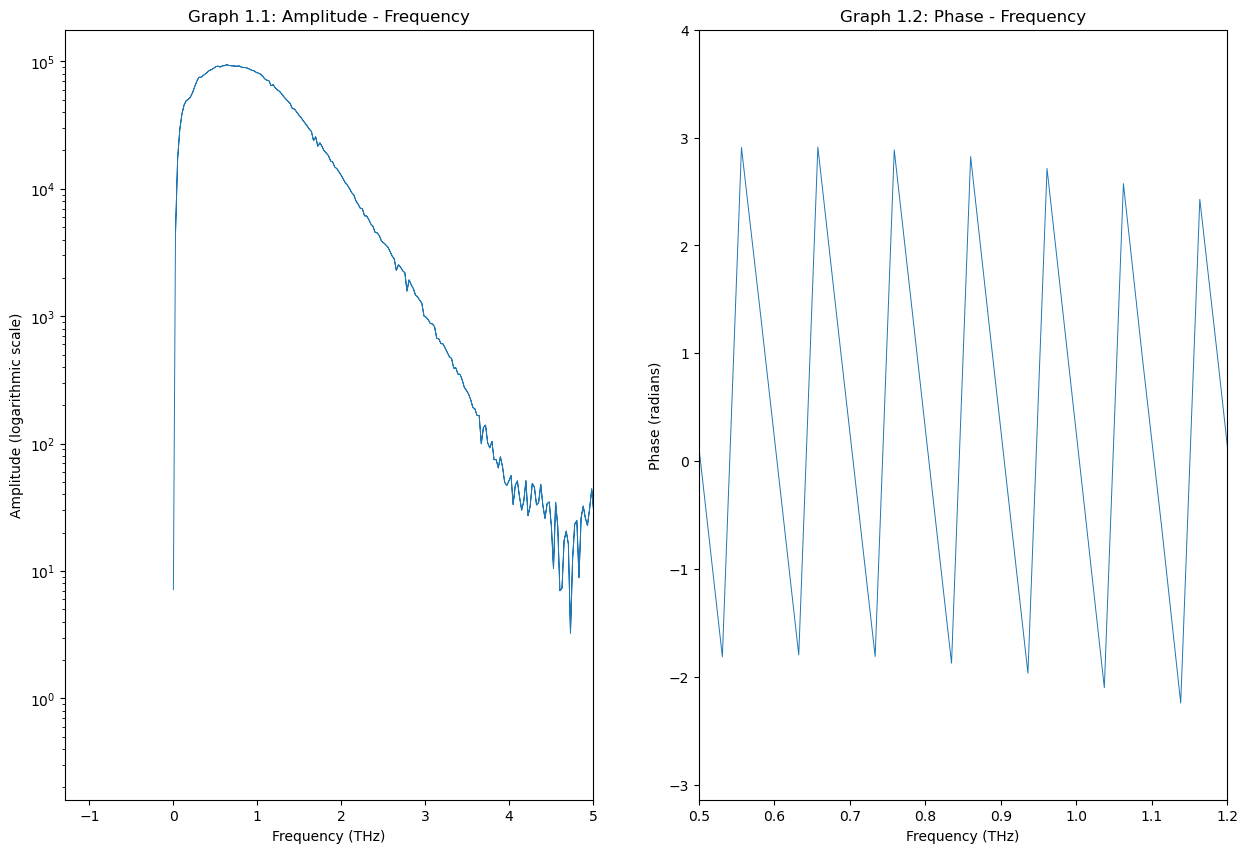

In [ ]:
#Attempt to perform Fourier Transform (Reference Data)
#We are going to perform a fast Fourier transform
frequency1domain = np.fft.fft(y1)
f1axis=np.fft.fftfreq(len(y1),1.93e-14)
fx1rightunits = f1axis / 1e12

mask = fx1rightunits > 0

#First plot should be the real part of the FFT
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.plot(np.abs(fx1rightunits),(np.abs(frequency1domain)), linewidth = 0.7)
plt.yscale("log")
plt.xscale("linear")
plt.xlim(xmax = 5)
plt.title("Graph 1.1: Amplitude - Frequency")
plt.xlabel("Frequency (THz)")
plt.ylabel("Amplitude (logarithmic scale)")

#Now we are going to get the phase of the FFT
plt.subplot(1,2,2)
plt.plot((fx1rightunits)[mask],(np.angle(frequency1domain))[mask], linewidth = 0.7)
plt.title("Graph 1.2: Phase - Frequency")
plt.yscale("linear")
plt.xscale("linear")
plt.xlim(xmax = 1.2, xmin = 0.5)
plt.ylim(ymax = 4, ymin = -3.14)
plt.xlabel("Frequency (THz)")
plt.ylabel("Phase (radians)")
plt.show()

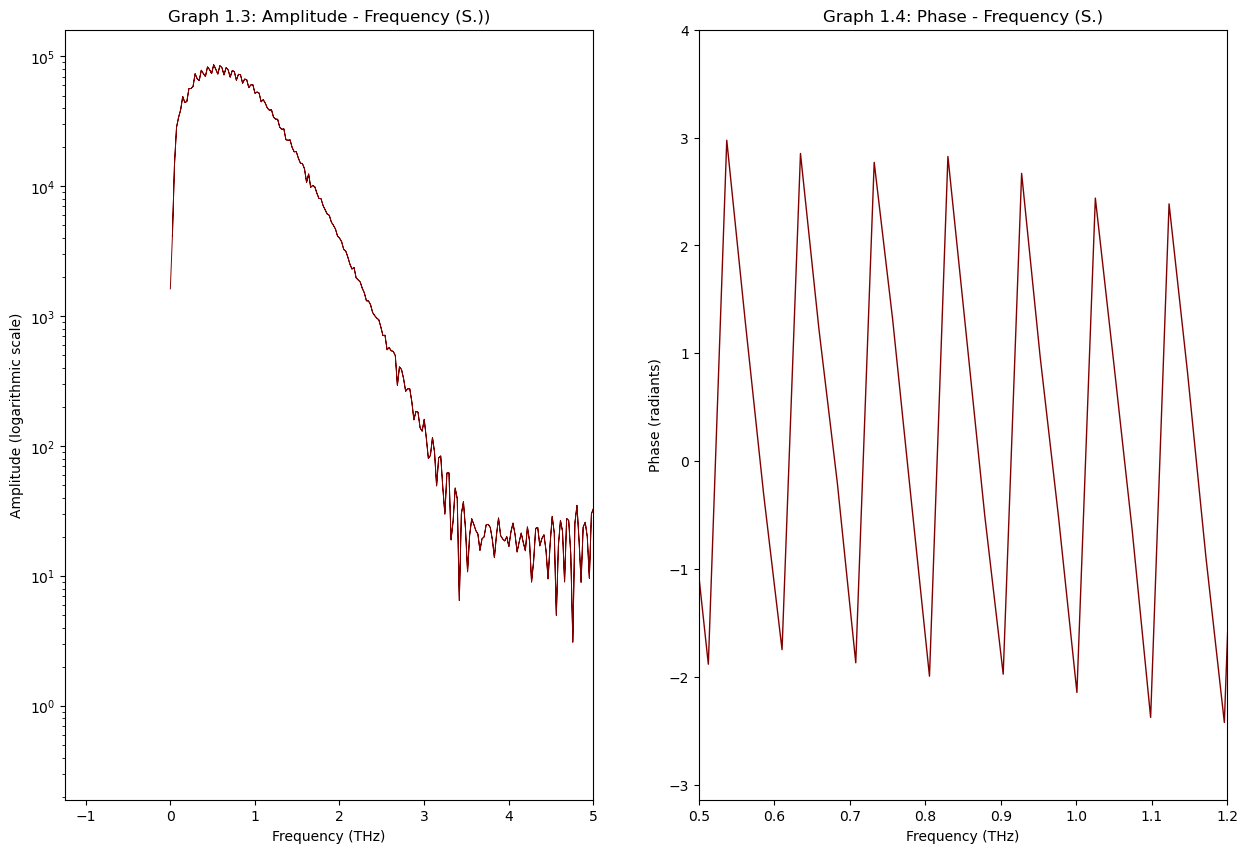

In [ ]:
#Attempt to perform Fourier Transform (Sample Data)
#We are going to perform a fast Fourier transform
frequency2domain = np.fft.fft(y2)
f2axis=np.fft.fftfreq(len(y2),0.02e-12)
fx2rightunits = f2axis / 1e12

mask = fx2rightunits > 0 

#First plot is the real part of the FFT
plt.figure(figsize = (15,10))
plt.subplot(1,2,1)
plt.plot(np.abs(fx2rightunits),(np.abs(frequency2domain)),color='maroon', linewidth = 0.7)
plt.yscale("log")
plt.xscale("linear")
plt.xlim(xmax = 5)
plt.title("Graph 1.3: Amplitude - Frequency (S.))")
plt.xlabel("Frequency (THz)")
plt.ylabel("Amplitude (logarithmic scale)")

#Now we are going to get the phase of the FFT, for the sample data
plt.subplot(1,2,2)
plt.plot(fx2rightunits[mask],(np.angle(frequency2domain, deg=False))[mask], color = "maroon", linewidth = 1)
plt.title("Graph 1.4: Phase - Frequency (S.)")
plt.xscale("linear")
plt.yscale("linear")
plt.xlim(xmax = 1.2, xmin = 0.5)
plt.ylim(ymax = 4, ymin = -3.14)
plt.xlabel("Frequency (THz)")
plt.ylabel("Phase (radiants)")
plt.show()



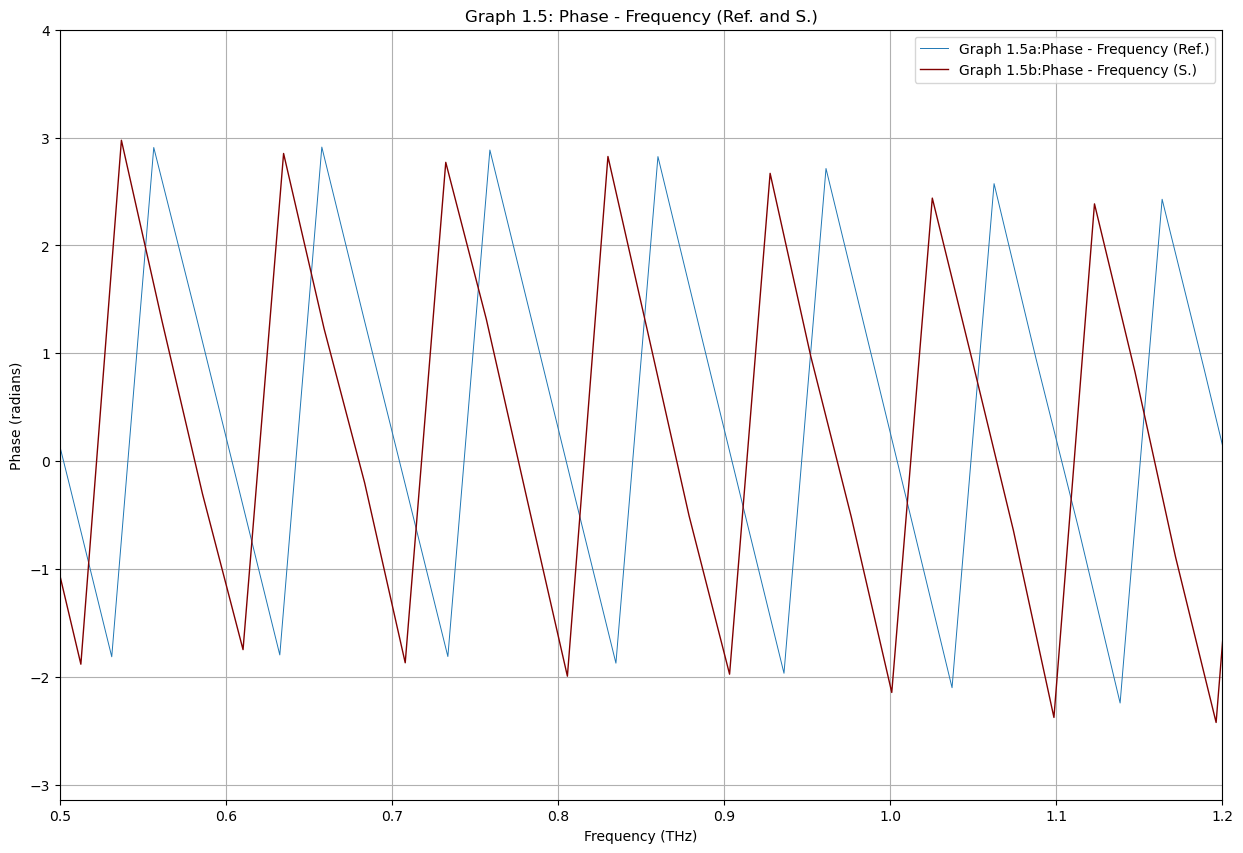

In [ ]:
#In this part I plot the wrapped phases of both sample and reference data

plt.figure(figsize=(15,10))
plt.plot(fx1rightunits[mask],(np.angle(frequency1domain, deg=False))[mask], linewidth = 0.7)
plt.plot(fx2rightunits[mask],(np.angle(frequency2domain, deg=False))[mask], color = "maroon", linewidth = 1)
plt.title("Graph 1.5: Phase - Frequency (Ref. and S.)")
plt.xscale("linear")    
plt.yscale("linear")
plt.xlim(xmax = 1.2, xmin = 0.5)
plt.ylim(ymax = 4, ymin = -3.14)
plt.xlabel("Frequency (THz)")
plt.ylabel("Phase (radians)")
plt.legend(["Graph 1.5a:Phase - Frequency (Ref.)", "Graph 1.5b:Phase - Frequency (S.)"])
plt.grid("--")
plt.show()


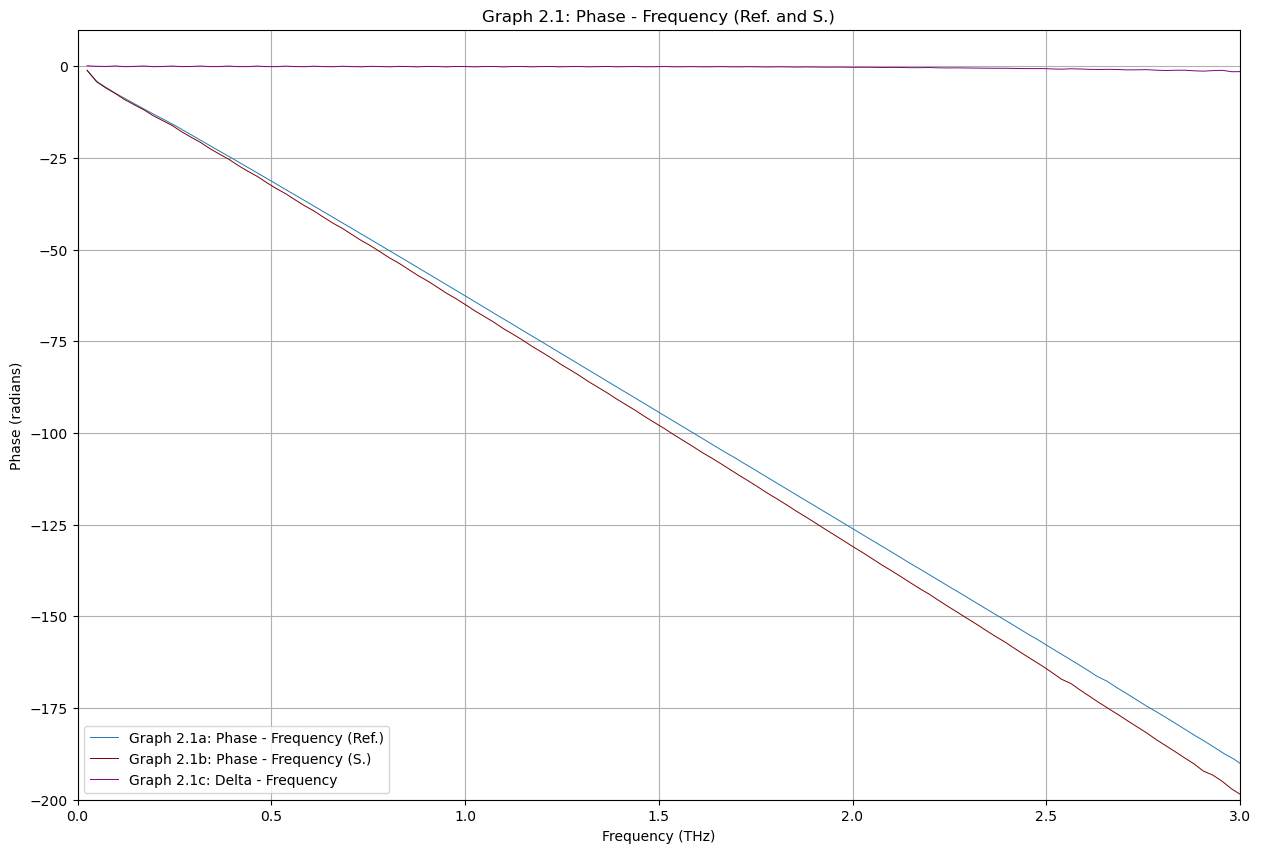

In [ ]:
#Here I plot the unwrapped
#phase of the reference data, the sample data and the difference between them

plt.figure(figsize=(15,10))  
Ph_unR=np.unwrap(np.angle(frequency1domain))
Ph_unS=np.unwrap(np.angle(frequency2domain))

Delta_ph=Ph_unS - Ph_unR #the unwrapped difference of the two phases

plt.plot( fx1rightunits[mask], np.unwrap(np.angle(frequency1domain)[mask]), linewidth = 0.7)
plt.plot(fx2rightunits[mask], np.unwrap(np.angle(frequency2domain)[mask]), color = "maroon", linewidth = 0.7)
plt.plot(fx2rightunits[mask], Delta_ph[mask], color = "purple", linewidth = 0.7)

plt.title("Graph 2.1: Phase - Frequency (Ref. and S.)")
plt.xscale("linear")
plt.yscale("linear")
plt.xlim(xmax = 3, xmin = 0)
plt.ylim(ymax = 10, ymin = -200)
plt.xlabel("Frequency (THz)")
plt.ylabel("Phase (radians)")   
plt.legend(["Graph 2.1a: Phase - Frequency (Ref.)", "Graph 2.1b: Phase - Frequency (S.)", "Graph 2.1c: Delta - Frequency "])
plt.grid("--")
plt.show()


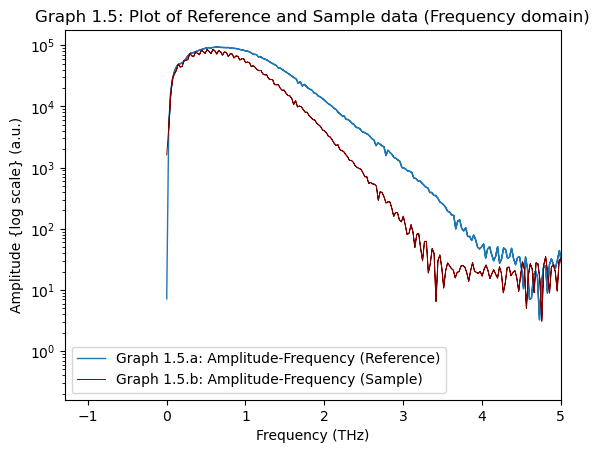

In [ ]:
#Plot both of the previous graphs so that we can see the comparison
#I  plot together the real parts of reference and sample amplitudes, versus their respective frequencies
plt.plot(np.abs(fx1rightunits),(np.abs(frequency1domain)), linewidth = 1)
plt.plot(np.abs(fx2rightunits),np.abs(frequency2domain), color = "maroon",linewidth = 0.7)
plt.xlim( xmax = 5)
plt.xlabel("Frequency (THz)")
plt.ylabel("Amplitude {log scale} (a.u.)")
plt.title("Graph 1.5: Plot of Reference and Sample data (Frequency domain)")
plt.legend(["Graph 1.5.a: Amplitude-Frequency (Reference)", "Graph 1.5.b: Amplitude-Frequency (Sample)"])
plt.yscale("log")
plt.xscale("linear")
plt.show()

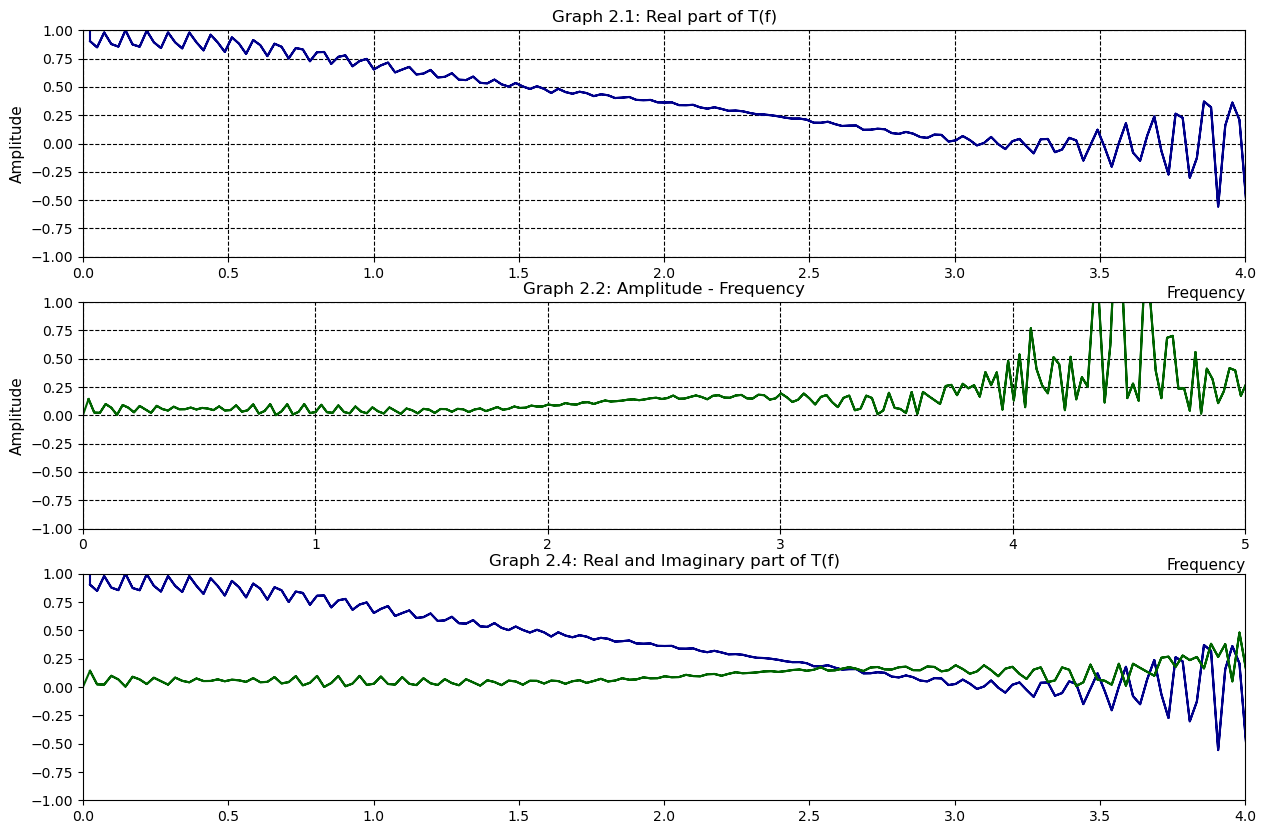

In [ ]:
#In this step I attempt to plot the real and imaginary part of the Transfer function
#I decided to symbolize the Transfer Function with T(f) 
t_amp = (frequency2domain / frequency1domain )
plt.figure(figsize = (15,10))
plt.subplot(3,1,1)
plt.plot(np.abs(fx2rightunits),np.real(t_amp), color = "darkblue")
plt.xlabel("Frequency", fontsize = 11, loc = "right")
plt.ylabel("Amplitude", fontsize = 11)
plt.yscale("linear")
plt.xscale("linear")
plt.xlim(xmax = 4, xmin = 0)
plt.ylim(ymax =1, ymin = -1)
plt.grid(color = "black", linestyle = "--")
plt.title("Graph 2.1: Real part of T(f)", fontsize = 12)

#Here, I plot the Imaginary part of the Transfer function versus frequency
plt.subplot(3,1,2)
plt.plot(np.abs(fx2rightunits),np.abs(np.imag(t_amp)), color = "darkgreen")
plt.ylabel("Amplitude", fontsize = 11)
plt.ylim(ymax = 1, ymin = -1)
plt.xlim(xmax = 4, xmin = 0)
plt.title("Graph 2.2: Amplitude - Frequency", fontsize =12)
plt.grid(color = "black", linestyle = "--")
plt.xlabel("Frequency", fontsize = 11, loc = "right")
plt.yscale("linear")
plt.xscale("linear")
plt.xlim(xmax =5, xmin = 0)
plt.ylim(ymax = 1, ymin = -1)


#In the third graph, I plot together the real and imaginary parts to see how the graphs compare to each other
plt.subplot(3,1,3)
plt.plot(np.abs(fx2rightunits),np.real(t_amp), color = "darkblue")
plt.plot(np.abs(fx2rightunits),np.abs(np.imag(t_amp)), color = "darkgreen")
plt.title("Graph 2.4: Real and Imaginary part of T(f)", fontsize = 12)
plt.xlim(xmax = 4, xmin = 0)
plt.ylim(ymax = 1, ymin = -1)
plt.show()


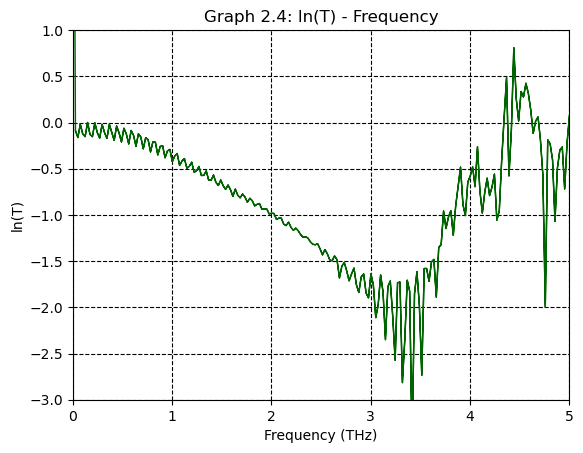

In [ ]:
#I plot the natural logarithm of the amplitude 
# versus the frequency to see the figure we get 
#in the numpy library, the log function is the natural logarithm
plt.plot(np.abs(fx2rightunits),np.real(np.log(t_amp)), color = "darkgreen", linewidth = 1)
plt.grid(color = "black", linestyle = "--")
plt.title("Graph 2.4: ln(T) - Frequency", fontsize = 12)
plt.ylabel("ln(T)")
plt.xlabel("Frequency (THz)")

plt.yscale("linear")
plt.xscale("linear")
plt.xlim(xmax = 5, xmin = 0)
plt.ylim(ymax= 1, ymin = -3)
plt.show()

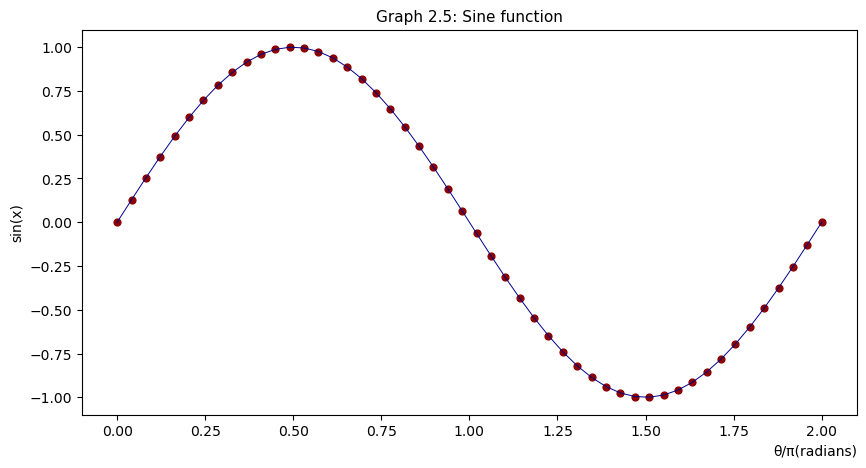

In [ ]:
#In this part I plot the sine function and the sampled function using linspace from numpy
#I use the linspace function to create an array of 50 points between 0 and 4pi
#I use the sine function to create the y values of the points
#I use the scatter function to plot the points and the plot function to connect them with a line
x = np.linspace(0, 2*np.pi, 50)
plt.figure(figsize = (10, 5))
plt.scatter(x/np.pi, np.sin(x), color = "darkred", s = 24)
plt.plot(x/np.pi,np.sin(x), color = "darkblue", linewidth = 0.7)
plt.title("Graph 2.5: Sine function", fontsize = 11)
plt.xlabel("θ/π(radians)", fontsize = 10, loc = "right")
plt.ylabel("sin(x)", fontsize = 10)
#plotting them together
plt.show()

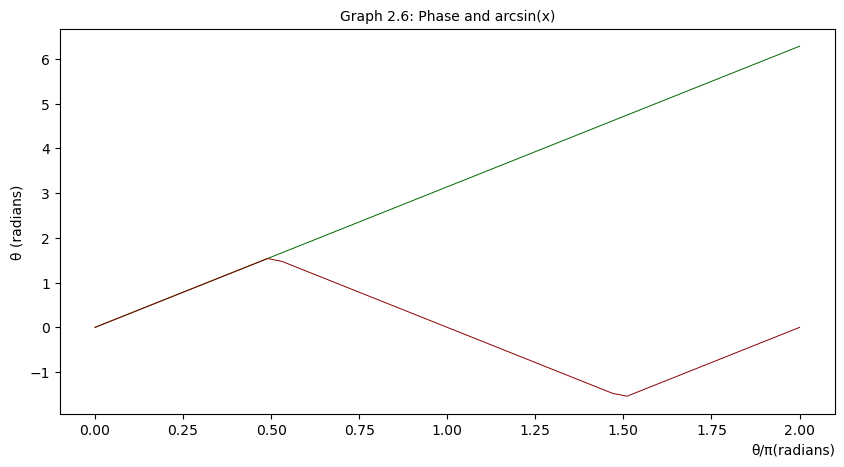

In [ ]:
#Now, I plot both the phase and the arcsin of the x function
plt.figure(figsize = (10, 5))        
plt.plot(x/np.pi ,x , color = "darkgreen", linewidth = 0.7)
plt.plot(x/np.pi,np.arcsin(np.sin(x)), color = "darkred", linewidth = 0.7)
plt.title("Graph 2.6: Phase and arcsin(x)", fontsize = 10)
plt.xlabel("θ/π(radians)", fontsize = 10, loc = "right")
plt.ylabel("θ (radians)", fontsize = 10)
plt.show()


(-1.0, 2.0)

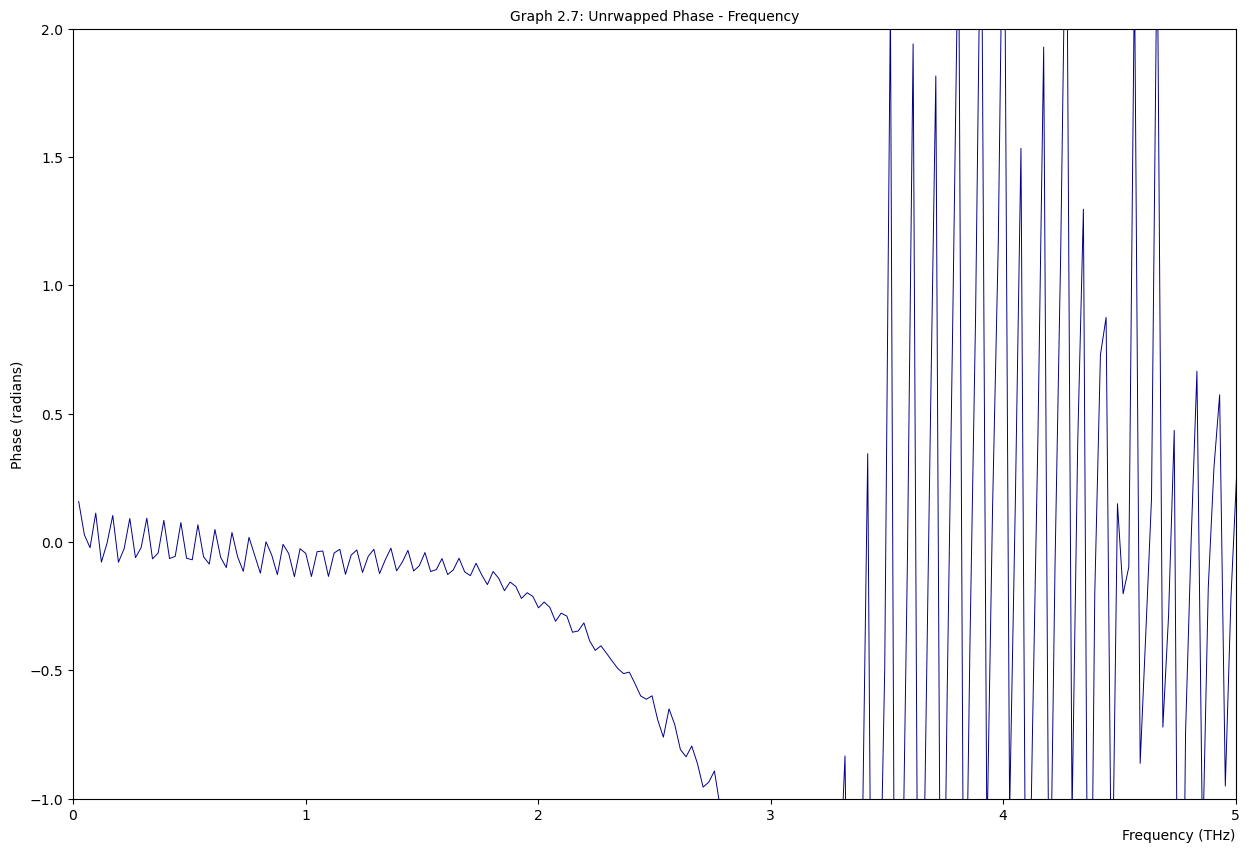

In [ ]:
#In this part I plot the wrapped phase of the transfer function
phexp =(np.angle(t_amp))[mask]

xaxis = (fx2rightunits[mask])
xaxishz = xaxis * 1e12
xaxishz[xaxishz == 0] = 1e-12  # Replace zeros with a small value
plt.figure(figsize = (15,10))
plt.plot(xaxis, phexp, color = "darkblue", linewidth = 0.7)
plt.title("Graph 2.7: Unrwapped Phase - Frequency", fontsize = 10)
plt.xlabel("Frequency (THz)", fontsize = 10, loc = "right")
plt.ylabel("Phase (radians)", fontsize = 10)
plt.xscale("linear")
plt.yscale("linear")
plt.xlim(xmax = 5, xmin = 0)
plt.ylim(ymax = 2, ymin = -1)

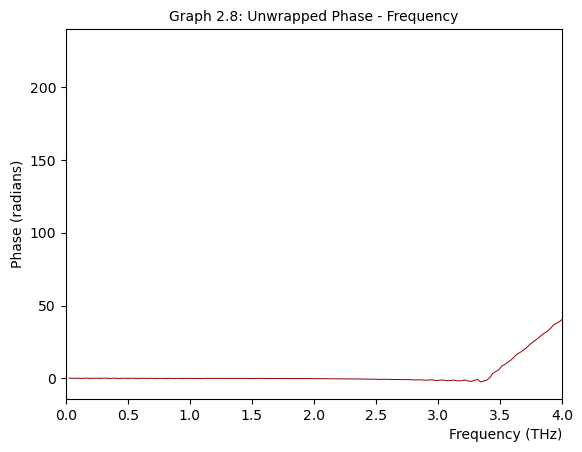

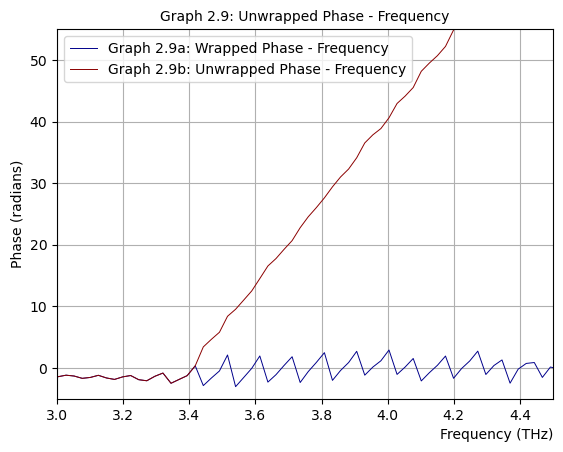

In [ ]:
#Phase unwrapping algorithm to avoide discontinuities in phase
#Using the following function I attempt to unwrap the phase of th Transfer Function T(f)
def unwrap_phase(phase):
    """
    Unwraps the phase to avoid discontinuities.
    """
    unwrapped = np.zeros_like(phase)
    unwrapped[0] = phase[0]
    for i in range(1, len(phase)):
        diff = phase[i] - phase[i - 1]
        if diff > np.pi:
            unwrapped[i] = unwrapped[i - 1] + (diff - 2 * np.pi)
        elif diff < -np.pi:
            unwrapped[i] = unwrapped[i - 1] + (diff + 2 * np.pi)
        else:
            unwrapped[i] = unwrapped[i - 1] + diff
    return unwrapped

ph = unwrap_phase(phexp)

#Plotting the unwrapped phase

plt.plot(xaxis, (ph), color = "darkred", linewidth = 0.7)
plt.title("Graph 2.8: Unwrapped Phase - Frequency", fontsize = 10)
plt.xlabel("Frequency (THz)", fontsize = 10, loc = "right")
plt.ylabel("Phase (radians)", fontsize = 10)
plt.xscale("linear")
plt.yscale("linear")
plt.xlim(xmax = 4, xmin = 0)
#plt.ylim(ymax = 1, ymin = -1)
plt.show()


plt.plot(xaxis, (phexp), color = "darkblue", linewidth = 0.7)
plt.plot(xaxis, (ph), color = "darkred", linewidth = 0.7)
plt.title("Graph 2.9: Unwrapped Phase - Frequency", fontsize = 10)
plt.xlabel("Frequency (THz)", fontsize = 10, loc = "right")
plt.ylabel("Phase (radians)", fontsize = 10)
plt.legend(["Graph 2.9a: Wrapped Phase - Frequency", "Graph 2.9b: Unwrapped Phase - Frequency"])
plt.grid("--")
plt.xscale("linear")
plt.yscale("linear")
plt.xlim( xmin = 3,xmax = 4.5)
plt.ylim( ymin = -5,ymax = 55)
plt.show()


#This part of the code is not working as expected. 


In [ ]:
#Calculation of refractive index n of the sample

"""
The average refractive index can be calculated by the time difference between the two signals, that's the reference 
and the sample signal. If I estimate the time difference, then the refractive index should be equal to the
following relation: 
navg = 1 + (c * dt) / d
where c is the speed of light, dt is the time difference between the two signals and d is the sample thickness.

"""

#The time difference of the two maxima is approximately 6 picoseconds
dt = 6 * 1e-12 #seconds
c = 299792458 #speed of light in m/s
d = 0.002 #thickness of sample in m

navg = 1 + (c * dt) / d
print("The average refractive index is: ", navg)


The average refractive index is:  1.8993773740000002


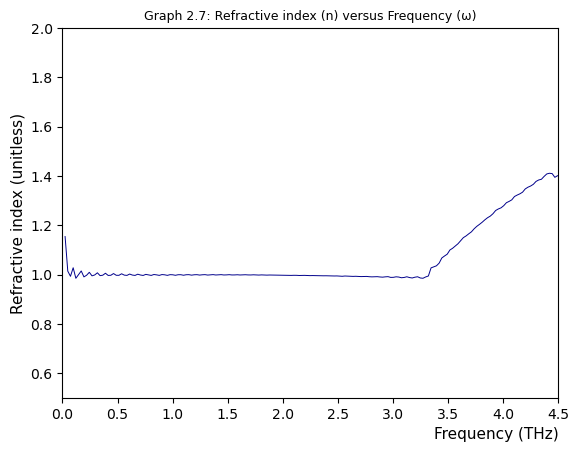

In [ ]:
#Try to plot the refractive index using the relation given 

n = 1 + ((Delta_ph)[mask] * c) / (xaxishz*2*np.pi* d)

plt.plot(xaxis , n , color = "darkblue", linewidth = 0.7)
plt.title("Graph 2.7: Refractive index (n) versus Frequency (ω)", fontsize = 9)         
plt.xlabel("Frequency (THz)", fontsize = 11, loc = "right")
plt.ylabel("Refractive index (unitless)", fontsize = 11)  
plt.xscale("linear")
plt.yscale("linear")  
plt.xlim(xmax = 4.5, xmin = 0 )
plt.ylim(ymax = 2, ymin = 0.5)
plt.show()




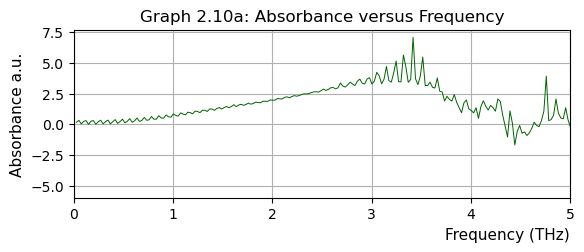

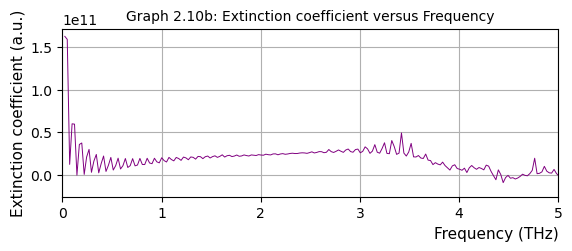

In [ ]:
#In this part I try to plot the absorbance versus frequency

a = - (2/d) * np.log(((n+1)**2/(4*n))*np.abs((t_amp[mask])))

plt.subplot(2,1,1)
plt.title("Graph 2.10a: Absorbance versus Frequency", fontsize = 12)
plt.plot(xaxis, (a*d), color = "darkgreen", linewidth = 0.7)
plt.xlabel("Frequency (THz)", fontsize = 11, loc = "right") 
plt.ylabel("Absorbance a.u.", fontsize = 11)
plt.xscale("linear")
plt.yscale("linear")
plt.grid("--")
plt.xlim(xmax = 5, xmin = 0)
plt.show()

"""We know that the extinction coefficient k is a function of a and omega as follows
k = ac/2ω """
k = (a*c)/ (2*xaxis*np.pi)
plt.subplot(2,1,2)
plt.plot(xaxis, k,color = "purple", linewidth = 0.7)
plt.title("Graph 2.10b: Extinction coefficient versus Frequency", fontsize = 10)
plt.xlabel("Frequency (THz)", fontsize = 11, loc = "right")
plt.ylabel("Extinction coefficient (a.u.)", fontsize = 11)
plt.grid("--")
plt.xlim(xmax = 5, xmin = 0)

plt.show()



This program uses the Newton-Raphson Method to estimate the roots of any given function. We use a specific 
number of iterations and an initial guess we call x0. We can also choose to change the accuracy by setting a much smaller 
value of tolerance. 

Now, using python, I  try to apply this method on the problem we're working on.

In [ ]:
# Base structure of the Newton-Raphson method

ω = 2 * np.pi * xaxishz  # angular frequency omega
n0 = 1  # refractive index of air
k = 1e-14j  # absorption coefficient (I choose a small value for k)
x0 = 1.5 + k  # initial guess for the complex refractive index
c = 299792458  # speed of light in m/s

n = np.ones_like(xaxishz)  
n1 = n + k  # refractive index of the sample

def newraphson(F, dF, x0, tolerance=1e-12, maxit=150):
   
    x = x0
    for i in range(maxit):
        fx = F(x)
        dfx = dF(x)
        if np.abs(fx) < tolerance:
            return x
        if dfx == 0:
            raise ValueError("Derivative is zero. No solution found.")
        x = x - fx / dfx
    raise ValueError("Maximum iterations reached. No solution found.")

# Initialize Ref array
Ref = np.zeros_like(ω, dtype=complex)

# Loop over each frequency to find the refractive index
for i, omega in enumerate(ω):
    def F(x):
        n1 = x  # Update n1 based on x
        return np.log((4 * n0 * n1) / (n0 + n1)**2) - (omega * 0.002j / c) * (n1 - n0)

    def dF(x):
        n1 = x  
        return 1 / n1 - (2 / (n0 + n1)) - (omega * 0.002j) / c

    # Calculate using Newton-Raphson method
    Ref[i] = newraphson(F, dF, x0, tolerance=1e-12, maxit=100)

# Print the results, the values of the refractive index
print(f"Ref = {Ref}")


Ref = [1.+5.29343645e-18j 1.+4.21319275e-22j 1.+1.09052132e-24j ...
 1.+0.00000000e+00j 1.+0.00000000e+00j 1.+0.00000000e+00j]


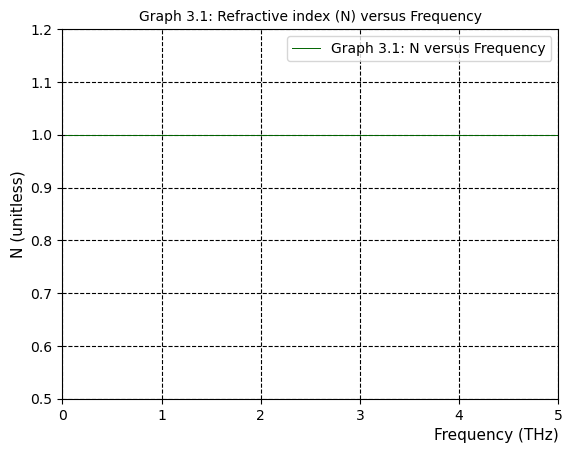

In [ ]:
"""I now try to plot the complex refractive index versus frequency"""

plt.figure()
plt.plot(xaxis, np.real(Ref), color = "darkgreen", linewidth = 0.7)
plt.title("Graph 3.1: Refractive index (N) versus Frequency", fontsize = 10)
plt.xlim(xmax = 4, xmin = 0)
plt.ylim(ymax=2, ymin = 0)
plt.xlabel("Frequency (THz)", fontsize = 11, loc = "right")
plt.ylabel("N (unitless)", fontsize = 11)
plt.xscale("linear")    
plt.yscale("linear")
plt.xlim(xmax = 5, xmin = 0)
plt.ylim(ymax = 1.2, ymin = 0.5)
plt.grid(color = "black", linestyle = "--")
plt.legend(["Graph 3.1: N versus Frequency"])
plt.show()



In [ ]:
print("Zero values in xaxishz:", np.any(xaxishz == 0))
#this line checks if there are any zero values in the xaxishz array

Zero values in xaxishz: False
